In [14]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, classification_report

s3 = boto3.resource('s3')
bucket_name = 'grant-gonnerman-data-445'
bucket = s3.Bucket(bucket_name)

file_key = 'train.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

file_key2 = 'test.csv'

bucket_object2 = bucket.Object(file_key2)
file_object2 = bucket_object2.get()
file_content_stream2 = file_object2.get('Body')

# reading data file
train = pd.read_csv(file_content_stream, delimiter = '|')
test = pd.read_csv(file_content_stream2, delimiter = '|')
train.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


In [2]:
test.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526


In [3]:
train.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000


In [4]:
test.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
count,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000,498121.000000
mean,3.503257,915.608772,49.988990,5.495926,5.001281,2.499015,0.068054,0.222182,0.735190
std,1.707662,528.772880,28.873426,3.447683,3.163795,1.708182,0.521092,1.717867,1.320235
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000546,0.000000,0.000000
25%,2.000000,458.000000,24.930000,3.000000,2.000000,1.000000,0.008682,0.027348,0.160000
50%,4.000000,916.000000,50.030000,5.000000,5.000000,2.000000,0.016940,0.054550,0.352941
75%,5.000000,1374.000000,75.020000,8.000000,8.000000,4.000000,0.033929,0.109091,0.692308
max,6.000000,1831.000000,99.990000,11.000000,10.000000,5.000000,30.000000,99.710000,11.000000


In [ ]:
# from the descriptions we can see a count of 1879 observation in the train data and 498121 in the test data

In [5]:
# creating the frequency table of fraud
train['fraud'].value_counts() / train.shape[0]

0    0.944651
1    0.055349
Name: fraud, dtype: float64

<AxesSubplot: xlabel='fraud', ylabel='quantityModifications'>

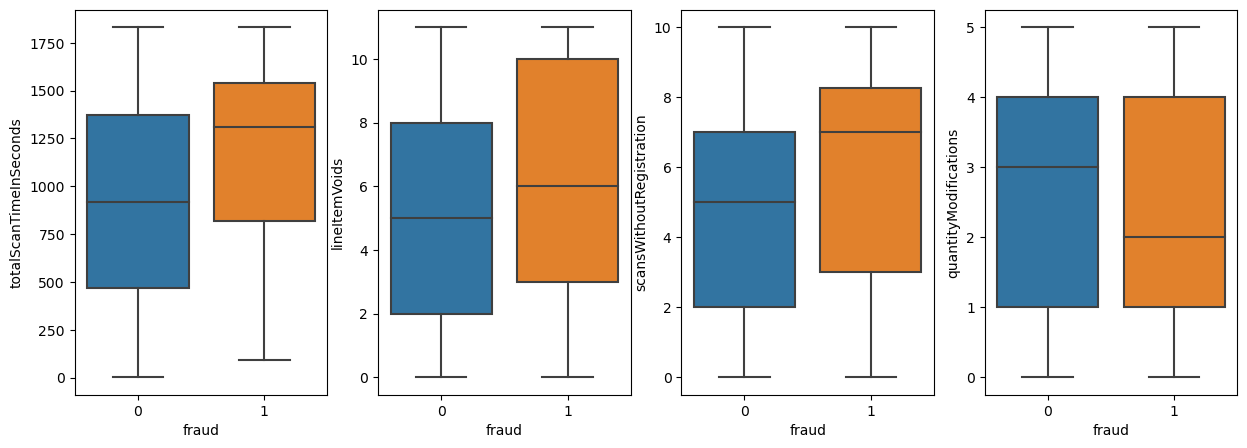

In [21]:
import seaborn as sns
fig, axes = plt.subplots(1, 4, figsize = (15, 5))
sns.boxplot(ax = axes[0], x ='fraud', y = 'totalScanTimeInSeconds', data = train)
sns.boxplot(ax = axes[1], x ='fraud', y = 'lineItemVoids', data = train)
sns.boxplot(ax = axes[2], x ='fraud', y = 'scansWithoutRegistration', data = train)
sns.boxplot(ax = axes[3], x ='fraud', y = 'quantityModifications', data = train)

In [ ]:
# from the above boxplots we can see the median fraudulent transaction is greater in totalScanTimeInSeconds, lineItemVoids, and scansWithoutRegistration
# but the median fraud is less in quantityModifications

<AxesSubplot: xlabel='fraud', ylabel='trustLevel'>

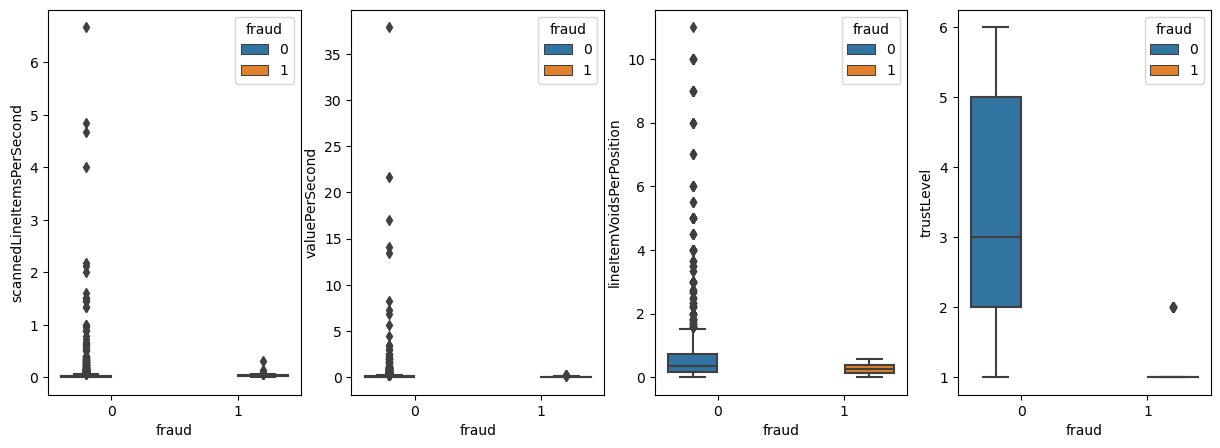

In [23]:
fig, axes = plt.subplots(1, 4, figsize = (15, 5))
sns.boxplot(ax = axes[0], x ='fraud', y = 'scannedLineItemsPerSecond', hue = 'fraud', data = train)
sns.boxplot(ax = axes[1], x ='fraud', y = 'valuePerSecond', hue = 'fraud', data = train)
sns.boxplot(ax = axes[2], x ='fraud', y = 'lineItemVoidsPerPosition', hue = 'fraud', data = train)
sns.boxplot(ax = axes[3], x ='fraud', y = 'trustLevel', hue = 'fraud', data = train)

In [ ]:
# these boxplots dont tell us too much, what can be noticed is that non-fraudulent transactions have a lot more outliers than fraudulent ones
# we can also see the trust level for most all fraudulent cases are 1 

Modeling 

In [15]:
# defining input and target variables 
x = train.drop(columns = 'fraud', axis = 1)
y = train['fraud']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)

In [19]:
# list to store coefficents 
rf_importances = list()

for i in range(0, 100):
    # splitting the data into train and test 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, stratify = y)

    #transforming the input data
    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train)

    # building RF model
    rf_md = RandomForestClassifier(n_estimators = 500, max_depth = 3).fit(x_train, y_train)
    # extracting importances
    rf_importances.append(rf_md.feature_importances_)

rf_results = pd.DataFrame(rf_importances)
rf_results.columns = [x] 
avg_importance = pd.DataFrame({'RF Importance': np.mean(rf_results)})
avg_importance = avg_importance.sort_values(by = 'RF Importance', ascending = False)
avg_importance

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,RF Importance
trustLevel,0.444267
scannedLineItemsPerSecond,0.152004
totalScanTimeInSeconds,0.119930
lineItemVoidsPerPosition,0.106166
valuePerSecond,0.061979
grandTotal,0.042734
lineItemVoids,0.041411
scansWithoutRegistration,0.028564
quantityModifications,0.002945


In [ ]:
# from rf importances we can see the top variables in terms of importance.
# i will choose the top 4 variables since there is a larger drop in importance after that

In [24]:
# defining importaint variables to use for modeling 
# defining input and target variables 
x = train[['trustLevel', 'scannedLineItemsPerSecond', 'totalScanTimeInSeconds', 'lineItemVoidsPerPosition']]
y = train['fraud']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)

In [25]:
# building random forest model
rf_md = RandomForestClassifier(n_estimators = 500, max_depth = 3).fit(x_train, y_train)
# predicting on the test
rf_pred = rf_md.predict_proba(x_test)[:,1]

#esimating cuttoff with precision recall curve
precision, recall, thresholds = precision_recall_curve(y_test, rf_pred)
rf_cutoffs = pd.DataFrame({'precision': precision, 'recall': recall})
# removing last element
rf_cutoffs = rf_cutoffs.drop(rf_cutoffs.index[len(rf_cutoffs.axes[0]) - 1])
rf_cutoffs['thresholds'] = thresholds 
# calculating euclidean dist
rf_cutoffs['Euclidean_dist'] = np.sqrt((1 - rf_cutoffs['precision']) ** 2 + (1 - rf_cutoffs['recall']) ** 2)
rf_cutoffs = rf_cutoffs.sort_values(by = 'Euclidean_dist').reset_index(drop = True)
rf_cutoffs

,precision,recall,thresholds,Euclidean_dist
0,0.882353,0.714286,0.342102,0.308988
1,0.833333,0.714286,0.338281,0.330772
2,0.666667,0.952381,0.304214,0.336718
3,0.692308,0.857143,0.314006,0.339238
4,0.933333,0.666667,0.353824,0.339935
...,...,...,...,...
292,0.062130,1.000000,0.001469,0.937870
293,0.060519,1.000000,0.000157,0.939481
294,0.059155,1.000000,0.000125,0.940845
295,0.055851,1.000000,0.000055,0.944149


In [26]:
# changing likelihoods to labels
rf_label = np.where(rf_pred < 0.342102, 0, 1)

# classification report
print(classification_report(y_test, rf_label))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       355
           1       0.88      0.71      0.79        21

    accuracy                           0.98       376
   macro avg       0.93      0.85      0.89       376
weighted avg       0.98      0.98      0.98       376



In [27]:
# building gradient boosting model
gb_md = GradientBoostingClassifier(n_estimators = 500, max_depth = 3, learning_rate = .1).fit(x_train, y_train)
# predicting on the test
gb_pred = gb_md.predict_proba(x_test)[:,1]

#esimating cuttoff with precision recall curve
precision, recall, thresholds = precision_recall_curve(y_test, gb_pred)
gb_cutoffs = pd.DataFrame({'precision': precision, 'recall': recall})
# removing last element
gb_cutoffs = gb_cutoffs.drop(gb_cutoffs.index[len(gb_cutoffs.axes[0]) - 1])
gb_cutoffs['thresholds'] = thresholds 
# calculating euclidean dist
gb_cutoffs['Euclidean_dist'] = np.sqrt((1 - gb_cutoffs['precision']) ** 2 + (1 - gb_cutoffs['recall']) ** 2)
gb_cutoffs = gb_cutoffs.sort_values(by = 'Euclidean_dist').reset_index(drop = True)
gb_cutoffs

,precision,recall,thresholds,Euclidean_dist
0,0.863636,0.904762,1.139279e-01,0.166329
1,0.833333,0.952381,6.825406e-02,0.173336
2,0.826087,0.904762,1.107876e-01,0.198283
3,0.857143,0.857143,1.705060e-01,0.202031
4,0.800000,0.952381,4.056202e-02,0.205591
...,...,...,...,...
327,0.056300,1.000000,4.357777e-09,0.943700
328,0.056150,1.000000,3.526891e-09,0.943850
329,0.056000,1.000000,2.994968e-09,0.944000
330,0.055851,1.000000,8.919013e-10,0.944149


In [28]:
# changing likelihoods to labels
gb_label = np.where(gb_pred < 0.1139279, 0, 1)

# classification report
print(classification_report(y_test, gb_label))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       355
           1       0.86      0.90      0.88        21

    accuracy                           0.99       376
   macro avg       0.93      0.95      0.94       376
weighted avg       0.99      0.99      0.99       376



In [ ]:
# based on the results I would choose gradient boosting to classify fraud because it has a much better recall for the fraudulent case 
# with similar values for all other metrics